# Libraries

In [1]:
!pip install -U -q keras-tuner

     |████████████████████████████████| 98 kB 3.6 MB/s 


In [2]:
!pip install keras

In [3]:
# BASED ON scikit learn DOCUMENTATION
import plotly.express as px
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split

# Metrics for sklearn models
from sklearn.metrics import classification_report, confusion_matrix

# Timer
import timeit

# Plotting
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

# Import the SVM library from sklearn
from sklearn.svm import SVC
from sklearn import svm

# Import the gridsearch library
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.activations import relu, sigmoid
from kerastuner.tuners import RandomSearch
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: DeprecationWarning:

`import kerastuner` is deprecated, please use `import keras_tuner`.



# Obtain

In [4]:
# Bringing in the Fashion MNIST dataset
from keras.datasets import fashion_mnist

In [5]:
# Breaking the data into training and testing
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


In [6]:
# Looking at the Shape of the training data
# The second row is looking at how many associated labels for training
print(x_train.shape)
print(len(y_train))


(60000, 28, 28)
60000


In [7]:
# Looking at the Shape of the test data
# The second row is looking at how many associated labels for test
print(x_test.shape)
print(len(y_test))

(10000, 28, 28)
10000


In [8]:
# Splitting the data into training and test achieves an 83.3% Split
1 - len(y_test) / len(y_train)

0.8333333333333334

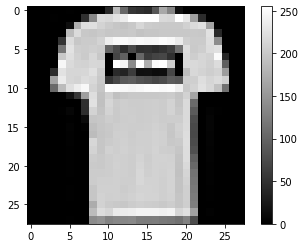

In [9]:
# Plotting a figure
plt.figure()
plt.imshow(x_train[1], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

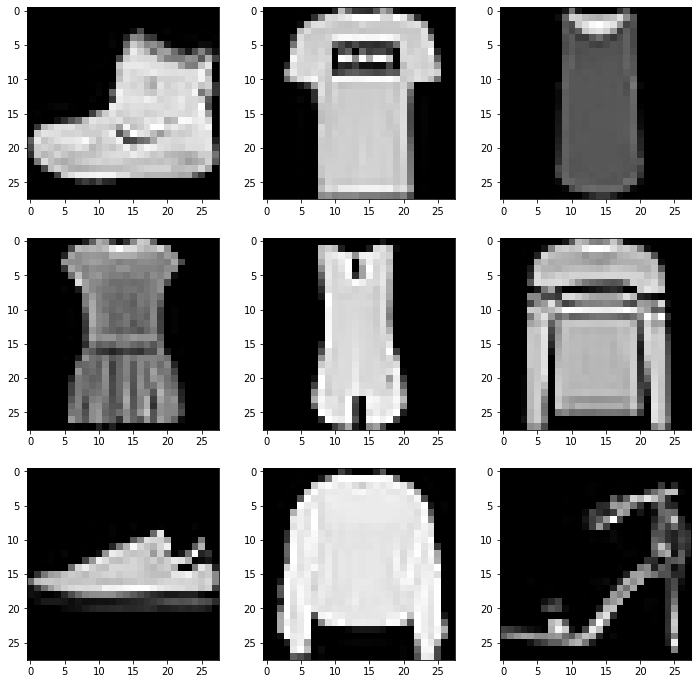

In [10]:
plt.figure(figsize=(12,12))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(3,3,i+1)
	# plot raw pixel data
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

## About the MNIST Data

* Fashion MIST is a dataset from Zalano's aritcle image.  In total 70,000 images of a wide variaty of styles.
* The training data consists of 60,000 images each at 28 x 28 pixels.
* The training data consists of 10,000 images each at 28 x 28 pixels.
* The data set has 10 different styles.
  0. T-shirt/top
  1. Trouser
  2. Pullover
  3. Dress
  4. Coat
  5. Sandal
  6. Shirt
  7. Sneaker
  8. Bag
  9. Ankle boot

* Additional information about the data can be found here: https://github.com/zalandoresearch/fashion-mnist






# Scrubbing

## Normalizing the Data

In [11]:
# Creating Label names to apply to graphics
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

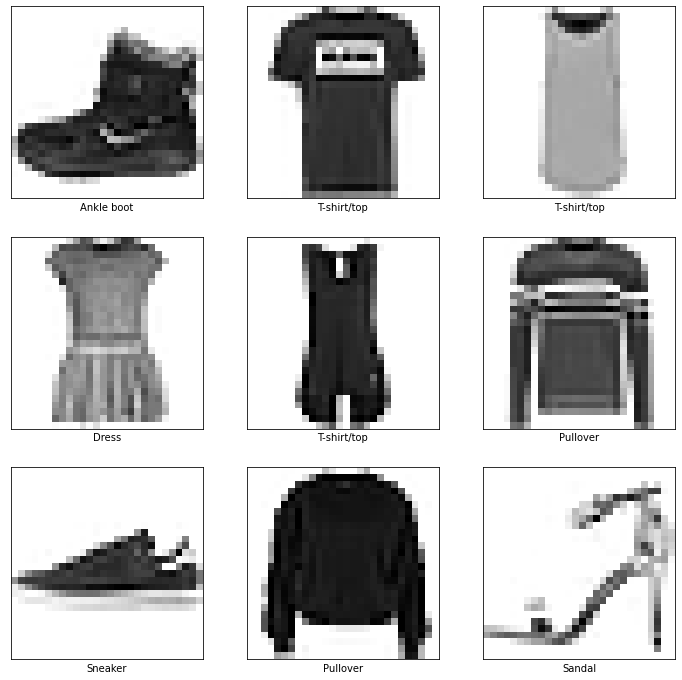

In [12]:
# Creating a plot for the first 9 images in the data set with their associated labels
plt.figure(figsize=(12,12))

# Looping through the first 9
for i in range(9):
  plt.subplot(3,3,i+1)
  
  # Removing the axis ticks
  plt.xticks([])
  plt.yticks([])

  # Removing gridlines
  plt.grid(False)

  # Showing the images
  plt.imshow(x_train[i], cmap=plt.cm.binary)

  # Adding associated label names
  plt.xlabel(label_names[y_train[i]])
    
plt.show()

In [13]:
# Converting the data to float 32
# Instead of our pixel data be 0 to 255 we want our data to be 1.
# so we will divide by 255

x_test = np.array(x_test, dtype=np.float32) / 255
y_test = np.array(y_test, dtype=np.float32) 

x_train = np.array(x_train, dtype=np.float32) / 255
y_train = np.array(y_train, dtype=np.float32) 


In [14]:
# Need to split this up with x and y
# The x is the pixel data
# The y is the labels

# This will exclude the label column
# Rescale all of our data
#x_train = x_train[:, 1:] / 255.0
# Taking all the rows
#y_train = y_train[:, 0]

#x_test = x_test[:,1:] / 255.0
#y_test = y_test[:, 0]


In [15]:
# Creating a validation datasete
x_train, x_validate, y_train, y_validate = train_test_split(
    x_train, y_train, test_size=0.2, random_state=12345,
)

## Shaping Data

In [16]:
# Reshaping the data some more
im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('x_validate shape: {}'.format(x_validate.shape))

x_train shape: (48000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_validate shape: (12000, 28, 28, 1)


## Scrub & Shape for SVM

In [17]:
# Breaking the data into training and testing
(x_train_svm, y_train_svm), (x_test_svm, y_test_svm) = fashion_mnist.load_data()

x_train_svm = np.array(x_train_svm, dtype=np.float32) / 255.0
x_test_svm = np.array(x_test_svm, dtype=np.float32) / 255.0



In [18]:
# Creating the seed
random_state = check_random_state(3)

# Training Data Need Shuffling
permutation = random_state.permutation(len(x_train_svm))

x_train_svm = x_train_svm[permutation]
y_train_svm = y_train_svm[permutation]

# For the svm models shaping the image data.
x_train_svm = x_train_svm.reshape(x_train_svm.shape[0], -1)
x_test_svm = x_test_svm.reshape(x_test_svm.shape[0], -1)

# For the svm models shaping the label data.
y_train_svm = np.array(y_train_svm, dtype=np.int32)
y_test_svm = np.array(y_test_svm, dtype=np.int32)

In [19]:
x_train_svm.shape

(60000, 784)

In [20]:
x_test_svm.shape

(10000, 784)

# Model

## CNN Model
* Define the Model
* Create the Model
* Fit the model

### Define Model
* Passing a kernal of 3 allows for an image to pass over each image to then identify the best fit.
* Kernal's can be adjusted to identify better fit. 
* Here we will start with 3
* MaxPooling allows you to downsample.
* Shrinks the hieght and width down to 2.
* Adding a dense layer creates a posterior probability.

In [21]:
cnn_model = Sequential([
                        Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=im_shape),
                        MaxPooling2D(pool_size=2),
                        Dropout(0.2),
                        Flatten(),
                        Dense(32, activation='relu'),
                        Dense(10, activation='softmax')
])

## Creating Model

In [22]:
tensorboard = TensorBoard(
    log_dir=r'logs\{}'.format('cnn_1layer'),
    write_graph = True,
    write_grads=True,
    histogram_freq=1,
    write_images=True,
    
)

cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=0.001),
    metrics=['accuracy']
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [23]:
cnn_model.fit(
    x_train, y_train, batch_size=batch_size,
    epochs=10, verbose=1,
    validation_data=(x_validate, y_validate)
    #,callbacks=[tensorboard]
)

Epoch 1/10
94/94 [==============================] - 15s 21ms/step - loss: 0.7629 - accuracy: 0.7462 - val_loss: 0.4746 - val_accuracy: 0.8353
Epoch 2/10
94/94 [==============================] - 2s 17ms/step - loss: 0.4339 - accuracy: 0.8488 - val_loss: 0.3806 - val_accuracy: 0.8687
Epoch 3/10
94/94 [==============================] - 2s 18ms/step - loss: 0.3844 - accuracy: 0.8663 - val_loss: 0.3435 - val_accuracy: 0.8836
Epoch 4/10
94/94 [==============================] - 2s 19ms/step - loss: 0.3509 - accuracy: 0.8781 - val_loss: 0.3232 - val_accuracy: 0.8893
Epoch 5/10
94/94 [==============================] - 2s 19ms/step - loss: 0.3342 - accuracy: 0.8820 - val_loss: 0.3057 - val_accuracy: 0.8955
Epoch 6/10
94/94 [==============================] - 2s 19ms/step - loss: 0.3206 - accuracy: 0.8869 - val_loss: 0.2967 - val_accuracy: 0.8988
Epoch 7/10
94/94 [==============================] - 2s 18ms/step - loss: 0.3081 - accuracy: 0.8902 - val_loss: 0.2920 - val_accuracy: 0.8998
Epoch 8/10
9

## Fitting the Model

In [24]:
score = cnn_model.evaluate(x_test, y_test, verbose=0)
score2 = cnn_model.evaluate(x_train, y_train, verbose=0)

print("Test")
print("-------------------")
print('test loss: {:.4f}'.format(score[0]))
print(' test acc: {:.4f}'.format(score[1]))
print("-------------------")

print("Train")

print('train loss: {:.4f}'.format(score2[0]))
print(' train acc: {:.4f}'.format(score2[1]))
print("-------------------")

Test
-------------------
test loss: 0.3043
 test acc: 0.8919
-------------------
Train
train loss: 0.2603
 train acc: 0.9083
-------------------


## Understanding Cost of a Model

In [25]:
# Starting the Timer
start = timeit.default_timer()

### Defining Model
cnn_model = Sequential([
                        Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=im_shape),
                        MaxPooling2D(pool_size=2),
                        Dropout(0.2),
                        Flatten(),
                        Dense(32, activation='relu'),
                        Dense(10, activation='softmax')
])

### Creating Model
tensorboard = TensorBoard(
    log_dir=r'logs\{}'.format('cnn_1layer'),
    write_graph = True,
    write_grads=True,
    histogram_freq=1,
    write_images=True,
    
)

### Fitting the Model
cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=0.001),
    metrics=['accuracy']
)

cnn_model.fit(
    x_train, y_train, batch_size=batch_size,
    epochs=10, verbose=1,
    validation_data=(x_validate, y_validate)
    #,callbacks=[tensorboard]
)

# Ending the timer
stop = timeit.default_timer()




Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



94/94 [==============================] - 3s 22ms/step - loss: 0.7295 - accuracy: 0.7544 - val_loss: 0.4504 - val_accuracy: 0.8487
Epoch 2/10
94/94 [==============================] - 2s 17ms/step - loss: 0.4341 - accuracy: 0.8472 - val_loss: 0.3731 - val_accuracy: 0.8763
Epoch 3/10
94/94 [==============================] - 2s 17ms/step - loss: 0.3804 - accuracy: 0.8672 - val_loss: 0.3542 - val_accuracy: 0.8764
Epoch 4/10
94/94 [==============================] - 2s 18ms/step - loss: 0.3481 - accuracy: 0.8780 - val_loss: 0.3207 - val_accuracy: 0.8908
Epoch 5/10
94/94 [==============================] - 2s 19ms/step - loss: 0.3259 - accuracy: 0.8847 - val_loss: 0.3186 - val_accuracy: 0.8883
Epoch 6/10
94/94 [==============================] - 2s 19ms/step - loss: 0.3154 - accuracy: 0.8890 - val_loss: 0.3122 - val_accuracy: 0.8873
Epoch 7/10
94/94 [==============================] - 2s 17ms/step - loss: 0.2998 - accuracy: 0.8930 - val_loss: 0.2855 - val_accuracy: 0.8987
Epoch 8/10
94/94 [======

In [26]:
cnn_full = pd.DataFrame()
result_list = list(range(1,11))

for n in result_list:

  # Starting the Timer
  start = timeit.default_timer()

  ### Defining Model
  cnn_model = Sequential([
                          Conv2D(filters=32, kernel_size=n, activation='relu', input_shape=im_shape),
                          MaxPooling2D(pool_size=2),
                          Dropout(0.2),
                          Flatten(),
                          Dense(32, activation='relu'),
                          Dense(10, activation='softmax')
  ])

  ### Creating Model
  tensorboard = TensorBoard(
      log_dir=r'logs\{}'.format('cnn_1layer'),
      write_graph = True,
      write_grads=True,
      histogram_freq=1,
      write_images=True,
      
  )

  ### Fitting the Model
  cnn_model.compile(
      loss='sparse_categorical_crossentropy',
      optimizer=Adam(lr=0.001),
      metrics=['accuracy']
  )

  cnn_model.fit(
      x_train, y_train, batch_size=batch_size,
      epochs=10, verbose=1,
      validation_data=(x_validate, y_validate)
      #,callbacks=[tensorboard]
  )



  # Computing the Scores
  test_score = cnn_model.evaluate(x_test, y_test, verbose=0)
  train_score = cnn_model.evaluate(x_train, y_train, verbose=0)

  # Ending the timer
  stop = timeit.default_timer()

  # initialize list of lists
  data = [[n , "Test", (stop - start) ,test_score[0], test_score[1]],
          [n , "Train", (stop - start) ,train_score[0], train_score[1]]]
    
  # Create the pandas DataFrame
  results_df = pd.DataFrame(data, columns = ['Run', 'Type', 'Cost','Loss', 'Accuracy'])
  cnn_full = cnn_full.append(results_df)


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



94/94 [==============================] - 3s 21ms/step - loss: 0.8937 - accuracy: 0.6896 - val_loss: 0.6208 - val_accuracy: 0.7892
Epoch 2/10
94/94 [==============================] - 2s 17ms/step - loss: 0.5923 - accuracy: 0.7908 - val_loss: 0.5535 - val_accuracy: 0.8037
Epoch 3/10
94/94 [==============================] - 2s 17ms/step - loss: 0.5545 - accuracy: 0.8003 - val_loss: 0.5217 - val_accuracy: 0.8127
Epoch 4/10
94/94 [==============================] - 2s 18ms/step - loss: 0.5360 - accuracy: 0.8065 - val_loss: 0.5050 - val_accuracy: 0.8224
Epoch 5/10
94/94 [==============================] - 2s 19ms/step - loss: 0.5180 - accuracy: 0.8147 - val_loss: 0.4920 - val_accuracy: 0.8235
Epoch 6/10
94/94 [==============================] - 2s 17ms/step - loss: 0.5133 - accuracy: 0.8141 - val_loss: 0.5001 - val_accuracy: 0.8236
Epoch 7/10
94/94 [==============================] - 2s 18ms/step - loss: 0.5040 - accuracy: 0.8185 - val_loss: 0.4737 - val_accuracy: 0.8352
Epoch 8/10
94/94 [======

In [27]:
cnn_full

,Run,Type,Cost,Loss,Accuracy
0,1,Test,22.377910,0.511131,0.817300
1,1,Train,22.377910,0.475240,0.825833
0,2,Test,23.577204,0.323222,0.881900
1,2,Train,23.577204,0.284345,0.899958
0,3,Test,27.875442,0.291394,0.897300
1,3,Train,27.875442,0.246972,0.912729
0,4,Test,21.583116,0.316866,0.885800
1,4,Train,21.583116,0.277108,0.900708
0,5,Test,19.289266,0.315220,0.887900
1,5,Train,19.289266,0.270461,0.905271


In [32]:
cnn_test = cnn_full
cnn_test["Cost Per Accuracy"] = cnn_test["Accuracy"] / cnn_test["Cost"]
cnn_test

,Run,Type,Cost,Loss,Accuracy,cost_per_accuracy,Cost Per Accuracy
0,1,Test,22.377910,0.511131,0.817300,0.036523,0.036523
1,1,Train,22.377910,0.475240,0.825833,0.036904,0.036904
0,2,Test,23.577204,0.323222,0.881900,0.037405,0.037405
1,2,Train,23.577204,0.284345,0.899958,0.038171,0.038171
0,3,Test,27.875442,0.291394,0.897300,0.032190,0.032190
1,3,Train,27.875442,0.246972,0.912729,0.032743,0.032743
0,4,Test,21.583116,0.316866,0.885800,0.041041,0.041041
1,4,Train,21.583116,0.277108,0.900708,0.041732,0.041732
0,5,Test,19.289266,0.315220,0.887900,0.046031,0.046031
1,5,Train,19.289266,0.270461,0.905271,0.046931,0.046931


In [33]:
px.line(cnn_full, x = "Run", y = "Accuracy", color = "Type", title = "Training & Validation Accuracy")

In [34]:
px.line(cnn_full, x = "Run", y = "Loss", color = "Type", title = "Training & Validation Loss")

In [35]:
cnn_filter = cnn_full[cnn_full["Type"]=="Test"]
px.line(cnn_filter, x = "Run", y = "Cost", title = "CNN Cost to Run")

In [38]:
cnn_filter = cnn_test[cnn_full["Type"]=="Test"]
px.line(cnn_filter, x = "Run", y = "Cost Per Accuracy", title = "CNN Cost Per Accuracy")

# Model - SVM

In [52]:
def param_query(x,y):
  # Creating a grid of parameters
  param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

  # Instantiation of GridSearchCV: estimater (SVM), grid, and a verbose (text output)
  grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3,n_jobs=-1)

  # Fitting the model
  grid.fit(x,y)

  # Printing the best output
  print(grid.best_params_)



In [53]:
# Subsetting the first 5000 points data to feed through GridSearch to find the best parameters
x = x_train_svm[:5000]
y = y_train_svm[:5000]

param_query(x,y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


Finding the GridSearch Results

In [56]:
# Define the model
model = SVC(C=10,gamma=0.01,verbose=3,kernel='rbf')

# Fit the model
model.fit(x_train_svm,y_train_svm)

[LibSVM]

SVC(C=10, gamma=0.01, verbose=3)

Results

In [57]:
# Make predictions
predictions = model.predict(x_test_svm)

In [58]:
df_accuracy = pd.DataFrame()

In [59]:
df_accuracy = df_accuracy.append({'Model': 'SVM', 'Accuracy': accuracy_score(y_test_svm,predictions)}, ignore_index=True)

In [60]:
df_accuracy

,Accuracy,Model
0,0.8999,SVM


In [61]:
# Starting the Timer
start = timeit.default_timer()

# Figuring out the time the model takes to run

# Subsetting the first 5000 points data to feed through GridSearch to find the best parameters
x = x_train_svm[:5000]
y = y_train_svm[:5000]

param_query(x,y)

# Subsetting the first 5000 points data to feed through GridSearch to find the best parameters
x = x_train_svm[:5000]
y = y_train_svm[:5000]

# Define the model
model = SVC(C=10,gamma=0.01,verbose=3,kernel='rbf')

# Fit the model
model.fit(x_train_svm,y_train_svm)

# Make predictions
predictions = model.predict(x_test_svm)

df_accuracy = pd.DataFrame()

df_accuracy = df_accuracy.append({'Model': 'SVM', 'Accuracy': accuracy_score(y_test_svm,predictions)}, ignore_index=True)
df_accuracy

# Starting the Timer
end = timeit.default_timer()

timer_length = start - end

Fitting 5 folds for each of 25 candidates, totalling 125 fits
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
[LibSVM]

In [62]:
timer_length

-1376.9808130269994